# This Analysis is adapted from MJ/Claudia's code
## Paul Meneses

In [17]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import lumicks.pylake as lk
from mpl_point_clicker import clicker
import csv
import matplotlib.patches as mpatches
%matplotlib widget

# Make sure we have written code that works: pylake2 environment 
print("The Pylake Version is: " + lk.__version__ + "\n")
# Should be version 0.10.1




The Pylake Version is: 1.2.0



In [18]:
#begin dataframe for iteration 

probe_num = []
force_probe_leave_all = []
time_probe_leave_all = []
position_probe_bind = []
mol_num = []
dirs = []


In [19]:
# Variables  ############################################################################################################
directory =r'C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha_PMeneses\\MJ force probes\\2023_12_01_probe_20nms_more_dataset_4mix_no_os20_and_then_os60_only\\' ## MJ Data




#directory=r'D:\\ctrap\\20230705_5 probe set_37C temp control then 2 probe set'

#########################################################################################################################

files = []
numis = 0
for filename in os.listdir(directory):
    if filename.endswith(".h5") and 'Kymograph' in filename:
        print(numis, os.path.join(filename))
        files.append(os.path.join(directory, filename))
        numis+=1
    else:
        continue

print('There are ',numis,' Kymograph file(s) in the directory.')
os.chdir(directory +'/')

0 20231201-135851 Kymograph 2 TETHER 1.h5
1 20231201-140043 Kymograph 3 tether 1.h5
2 20231201-140459 Kymograph 4 tether 1.h5
3 20231201-140945 Kymograph 6 tether 1.h5
4 20231201-141439 Kymograph 8 tether 1.h5
5 20231201-141632 Kymograph 9 tether 1.h5
6 20231201-141759 Kymograph 10 tether 1.h5
7 20231201-142054 Kymograph 11 tether 1.h5
8 20231201-142333 Kymograph 12 tether 1.h5
9 20231201-142602 Kymograph 13 tether 1.h5
10 20231201-142916 Kymograph 14 tether 1.h5
11 20231201-143147 Kymograph 15 tether 1.h5
12 20231201-143432 Kymograph 16 tether 1 broke.h5
13 20231201-145000 Kymograph 19 tether 2.h5
14 20231201-145322 Kymograph 20 tether 2.h5
15 20231201-145640 Kymograph 21 tether 2.h5
16 20231201-150024 Kymograph 22 tether 2.h5
17 20231201-150331 Kymograph 23 tether 2.h5
18 20231201-150806 Kymograph 25 tether 2.h5
19 20231201-151126 Kymograph 26 tether 2.h5
20 20231201-151406 Kymograph 27  tether 2 broke.h5
21 20231201-152016 Kymograph 28 tether 3.h5
22 20231201-152324 Kymograph 29 tet

Kymo number is ['4 tether 1'] .
0.3000064


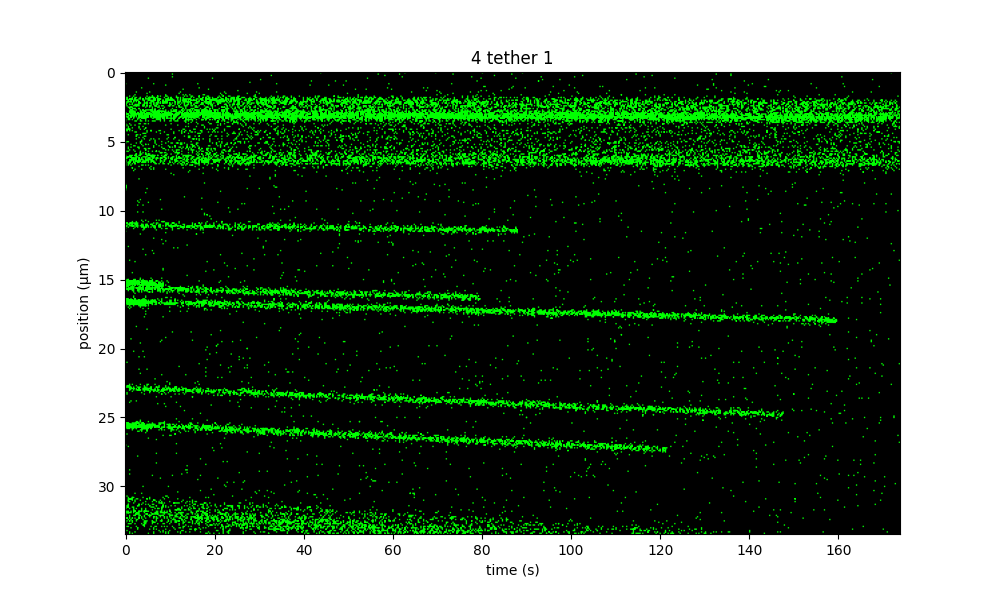

In [14]:
## Insert file order number here [0, 1, 2,... (total # Kymo files-1)]

#distance gaps top to bottom: 5 3 4 3 5 4
#distance gaps bottom to top: 4 5 3 4 3 5

num =2
#Set variables and outputs the Kymo file number from filename.
file = lk.File(files[num])
kymo_names = list(file.kymos)
print('Kymo number is',kymo_names,'.')
""
name, kymo = file.kymos.popitem()
print(kymo.line_time_seconds)

# plt.close()
# kymo.plot_with_force('2x', 'green')
# #plt.clim()
# plt.show()

# Functions
def mouse_event(event):
    global probe_coords
    while len(probe_coords) < 5:
#         global ix, iy 
        ix, iy = event.xdata, event.ydata
        probe_coords.append((ix, iy))
        event.clear()
    fig.canvas.mpl_disconnect(cid)
#     return probe_coords

probe_coords = []
file = lk.File(files[num])
for name, kymo in file.kymos.items():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    max_pixel_intensity = max(map(max, kymo.get_image('green')))
    kymo.plot(channel='green',aspect='auto',  adjustment=lk.ColorAdjustment(0, 1),vmax=max_pixel_intensity/10)
    cid = fig.canvas.mpl_connect('button_press_event', mouse_event)
#         plt.savefig(name, dpi=500)


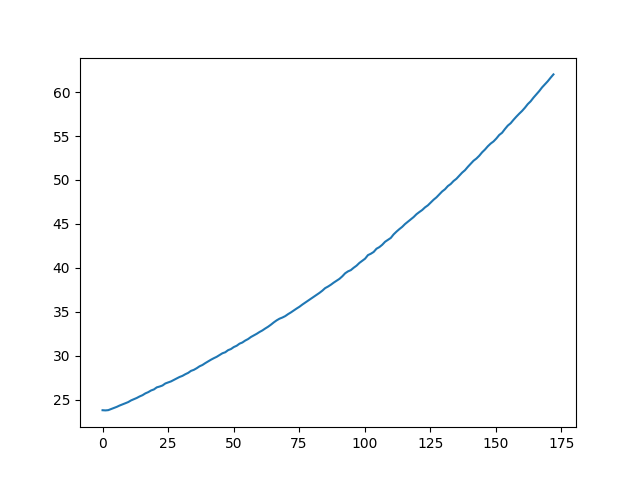

In [20]:
probe_x1=probe_coords[0][0] # first 
probe_y1=probe_coords[0][1] # first
probe_x2=probe_coords[1][0] # second
probe_y2=probe_coords[1][1] # second
probe_x3=probe_coords[2][0] # third
probe_y3=probe_coords[2][1] # third
probe_x4=probe_coords[3][0] # third
probe_y4=probe_coords[3][1] # third
probe_x5=probe_coords[4][0] # third
probe_y5=probe_coords[4][1] # third
abs_x1=probe_x1
abs_y1=probe_y1
abs_x2=probe_x2
abs_y2=probe_y2
abs_x3=probe_x3
abs_y3=probe_y3
abs_x4=probe_x4
abs_y4=probe_y4
abs_x5=probe_x5
abs_y5=probe_y5

#lf_dist = file["Distance"]["Distance 1"]
force2x_lf=file["Force HF"]["Force 2x"].downsampled_by(85077)
force2y_lf=file["Force HF"]["Force 2y"].downsampled_by(85077)
#print(lf_dist.data)

#lf_dist = file["Distance"]["Distance 1"]
#force2x_lf, lf_croppedx = file["Force HF"]["Force 2x"].downsampled_like(lf_dist)
#force2y_lf, lf_croppedy = file["Force HF"]["Force 2y"].downsampled_like(lf_dist)
force_lf = np.sqrt((force2x_lf.data**2 + force2y_lf.data**2))
#distance_lf = file.distance1.data
time_lf = force2x_lf.seconds
plt.close()
plt.figure()
plt.plot(time_lf, force_lf)
plt.show()





# Save the force data into excel sheet

In [21]:
#save data into dataframe

which_probe = [1,2,4,5] # can also be 2 or 3
import pandas as pd


for x in which_probe:
    if x == 1:
        probe_num.append(x)
        time_probe_leave = min(time_lf, key=lambda x:abs(x-abs_x1))
        force_probe_leave = force_lf[time_lf== time_probe_leave]
        force_probe_leave_all.append(float(force_probe_leave))
        time_probe_leave_all.append(time_probe_leave)
        position_probe_bind.append(probe_y1)
        mol_num.append(kymo_names[0])
        dirs.append(directory.split('/')[-1])
        print(force_probe_leave)

    if x == 2:
        probe_num.append(x)
        time_probe_leave = min(time_lf, key=lambda x:abs(x-abs_x2))
        force_probe_leave = force_lf [time_lf== time_probe_leave]
        force_probe_leave_all.append(float(force_probe_leave))
        time_probe_leave_all.append(time_probe_leave)
        position_probe_bind.append(probe_y2)
        mol_num.append(kymo_names[0])
        dirs.append(directory.split('/')[-1])
        print(force_probe_leave)

    if x == 3:
        probe_num.append(x)
        time_probe_leave = min(time_lf, key=lambda x:abs(x-abs_x3))
        force_probe_leave = force_lf [time_lf== time_probe_leave]
        force_probe_leave_all.append(float(force_probe_leave))
        time_probe_leave_all.append(time_probe_leave)
        position_probe_bind.append(probe_y3)
        mol_num.append(kymo_names[0])
        dirs.append(directory.split('/')[-1])
        print(force_probe_leave)
        
    if x == 4:
        probe_num.append(x)
        time_probe_leave = min(time_lf, key=lambda x:abs(x-abs_x4))
        force_probe_leave = force_lf [time_lf== time_probe_leave]
        force_probe_leave_all.append(float(force_probe_leave))
        time_probe_leave_all.append(time_probe_leave)
        position_probe_bind.append(probe_y4)
        mol_num.append(kymo_names[0])
        dirs.append(directory.split('/')[-1])
        print(force_probe_leave)
        
    if x == 5:
        probe_num.append(x)
        time_probe_leave = min(time_lf, key=lambda x:abs(x-abs_x5))
        force_probe_leave = force_lf [time_lf== time_probe_leave]
        force_probe_leave_all.append(float(force_probe_leave))
        time_probe_leave_all.append(time_probe_leave)
        position_probe_bind.append(probe_y5)
        mol_num.append(kymo_names[0])
        dirs.append(directory.split('/')[-1])
        print(force_probe_leave)
        
d = {'Directory':dirs,'Molecule Number':mol_num,'Probe Number': probe_num, 'Force (pN)': force_probe_leave_all, 'Time (s)': time_probe_leave_all, 'position (um)' : position_probe_bind}

df = pd.DataFrame(data=d)
print(df)

#df up to this iteration
# save current DF to excel
filename = directory.split('\\')[-3]+' '+directory.split('\\')[-2]

filepath = directory + "/" +filename + "20nms.xlsx"
df.to_excel(filepath, index=False)


[46.58031185]
[53.83492901]
[57.54073197]
[38.32136151]
                                           Directory Molecule Number  \
0  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
1  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
2  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
3  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   

   Probe Number  Force (pN)    Time (s)  position (um)  
0             1   46.580312  121.966387      27.339705  
1             2   53.834929  147.013056      24.874337  
2             4   57.540732  158.991898      17.913298  
3             5   38.321362   88.207834      11.459835  


C:\Users\paule\AppData\Local\Temp\ipykernel_37212\268468447.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\paule\AppData\Local\Temp\ipykernel_37212\268468447.py:23: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\paule\AppData\Local\Temp\ipykernel_37212\268468447.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\paule\AppData\Local\Temp\ipykernel_37212\268468447.py:56: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

In [192]:
# DELETE INCORRECT:
ind = -4
del dirs[ind:]
del mol_num[ind:]
del probe_num[ind:]
del force_probe_leave_all[ind:]
del time_probe_leave_all[ind:]
del position_probe_bind[ind:]
d = {'Directory':dirs,'Molecule Number':mol_num,
    'Probe Number': probe_num, 'Force (pN)': force_probe_leave_all, 'Time (s)': time_probe_leave_all, 'position (um)' : position_probe_bind}
df = pd.DataFrame(data=d)
print(df)
# save current DF to excel
filename = directory.split('\\')[-3]+' '+directory.split('\\')[-2]

filepath = directory + "/" +filename + "20nms.xlsx"
df.to_excel(filepath, index=False)

                                             Directory Molecule Number  \
0    C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
1    C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
2    C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
3    C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      4 tether 1   
4    C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...      6 tether 1   
..                                                 ...             ...   
99   C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...     46 tether 5   
100  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...     50 tether 5   
101  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...     50 tether 5   
102  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...     50 tether 5   
103  C:\\Users\\paule\\OneDrive - Johns Hopkins\\Ha...     50 tether 5   

     Probe Number  Force (pN)    Time (s)  position (um)  
0               1   46.580312  121.966387      27.33

# Visualize Dataset 

In [11]:

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import os

directory =r'C:\\Users\\paule\\OneDrive - Johns Hopkins\\Paul_Meneses_Ha_Lab_Data\\MJ force probes\\20230705_5 probe set_37C temp control then 2 probe set\\' ## MJ Data
#filepath = directory + "/" +filename + "20nms.xlsx"


df = pd.read_excel('20 nm per s all data.xlsx')
fig = px.violin(df, y="Force (pN)", points='all',color="Probe Number",box=True, labels="Probe Number")
fig.update_layout(violinmode='group',title="OS standard ALL datasets 20nm/s",width=800, height=400, yaxis_zeroline=False)
fig.update_traces(opacity=0.75)
fig.update_yaxes(range=[0,100])
fig.show()